In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('/content/heartdisease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.shape

(1025, 14)

In [ ]:
Columns = pd.DataFrame(df.columns)
Columns

,0
0,age
1,sex
2,cp
3,trestbps
4,chol
5,fbs
6,restecg
7,thalach
8,exang
9,oldpeak


In [ ]:
Columns = pd.DataFrame(df.columns)
Columns

,0
0,age
1,sex
2,cp
3,trestbps
4,chol
5,fbs
6,restecg
7,thalach
8,exang
9,oldpeak


NameError: ignored

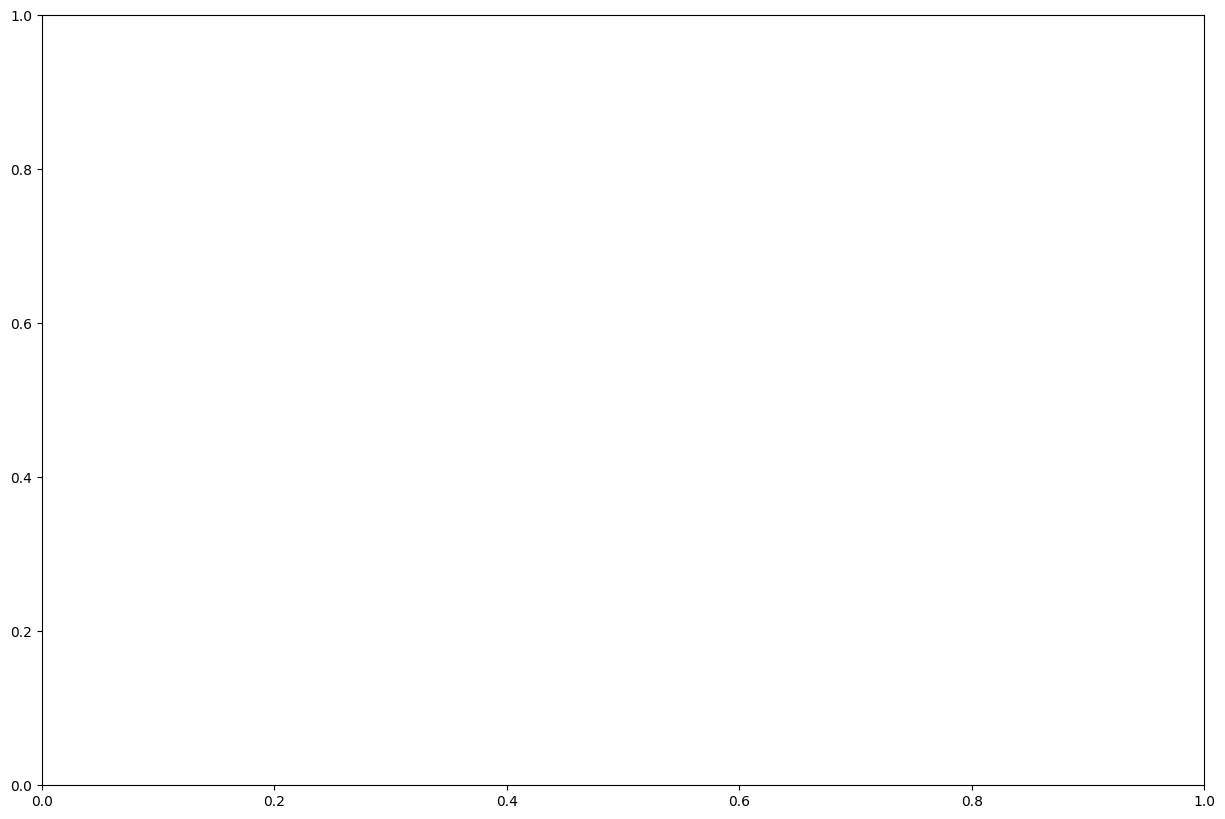

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [ ]:
df.loc[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


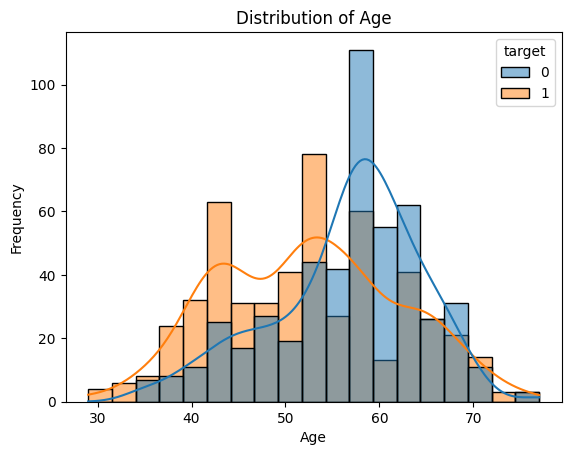

In [ ]:
sns.histplot(data=df, x="age", kde=True, hue="target")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

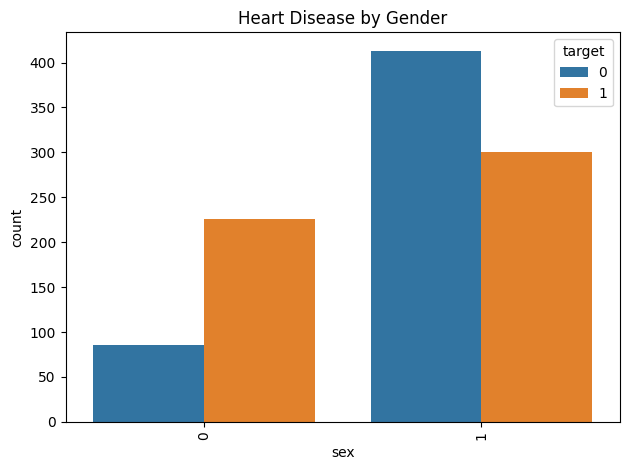

In [ ]:
sns.countplot(data=df, x="sex", hue="target")
plt.title("Heart Disease by Gender")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


age
Skew : -0.25


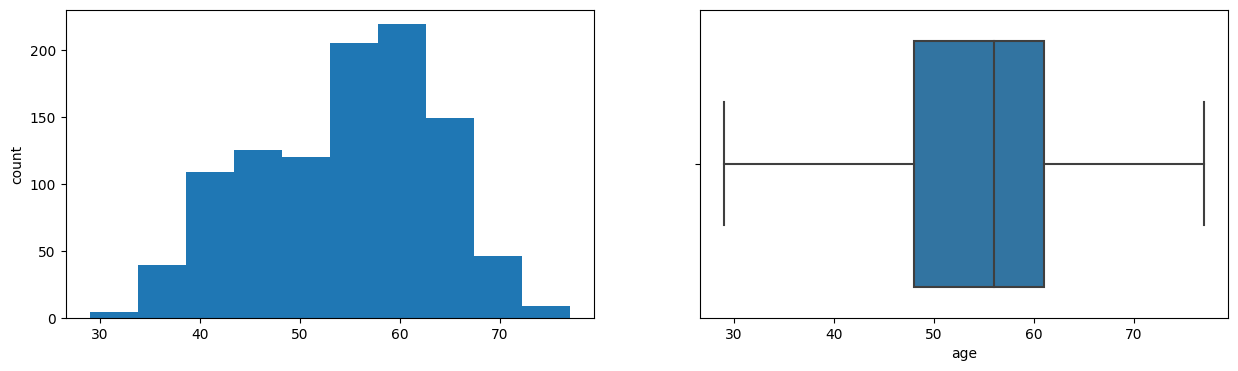

sex
Skew : -0.85


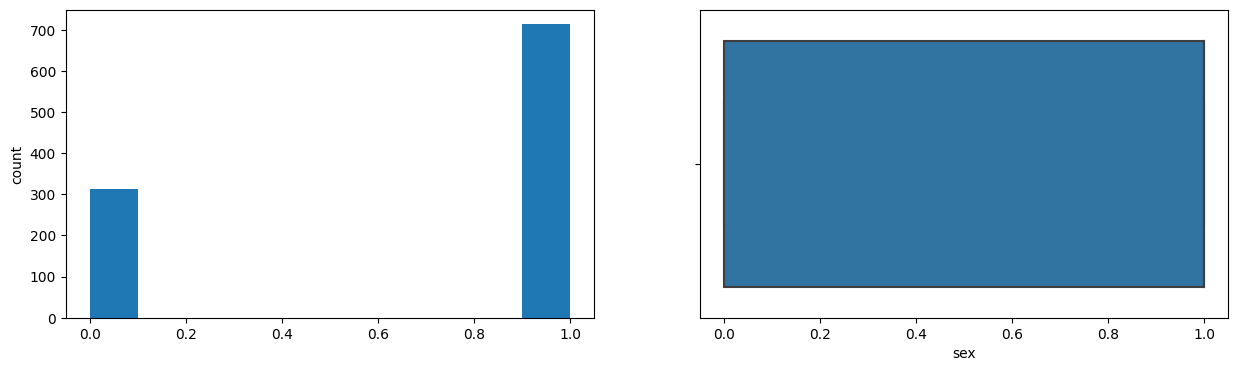

cp
Skew : 0.53


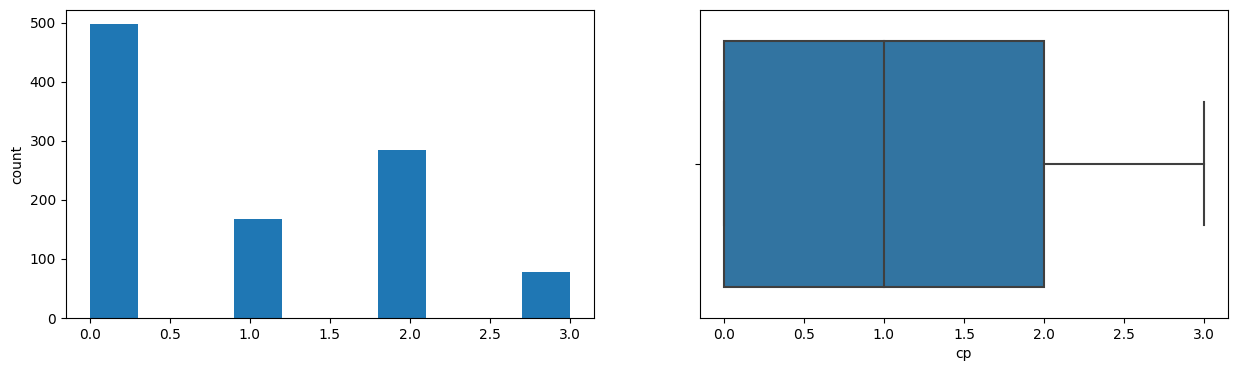

trestbps
Skew : 0.74


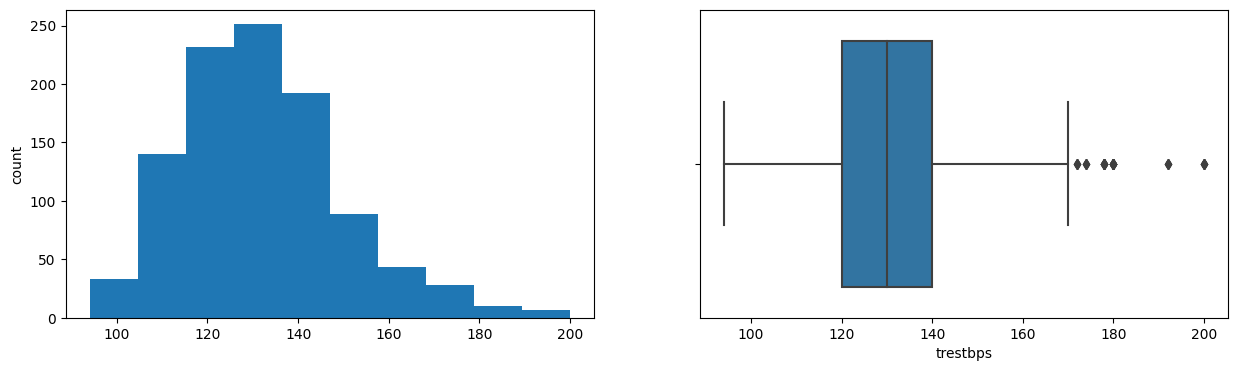

chol
Skew : 1.07


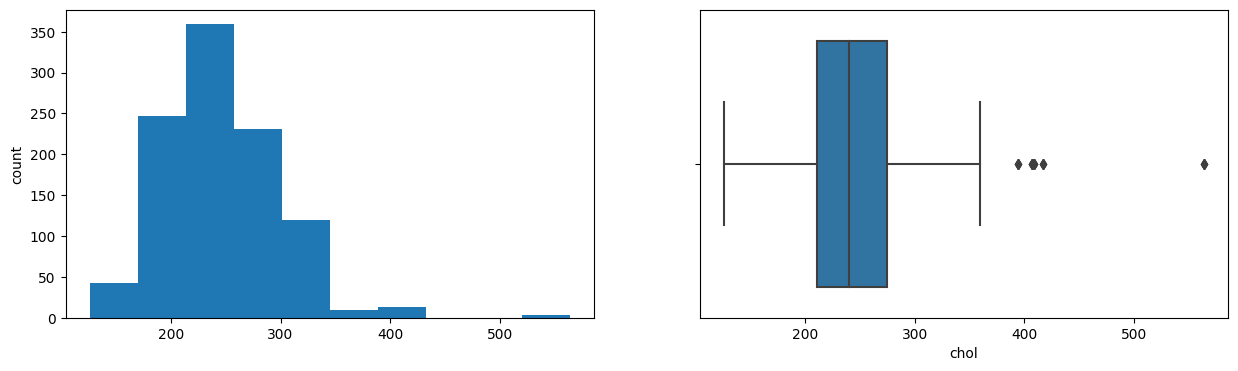

fbs
Skew : 1.97


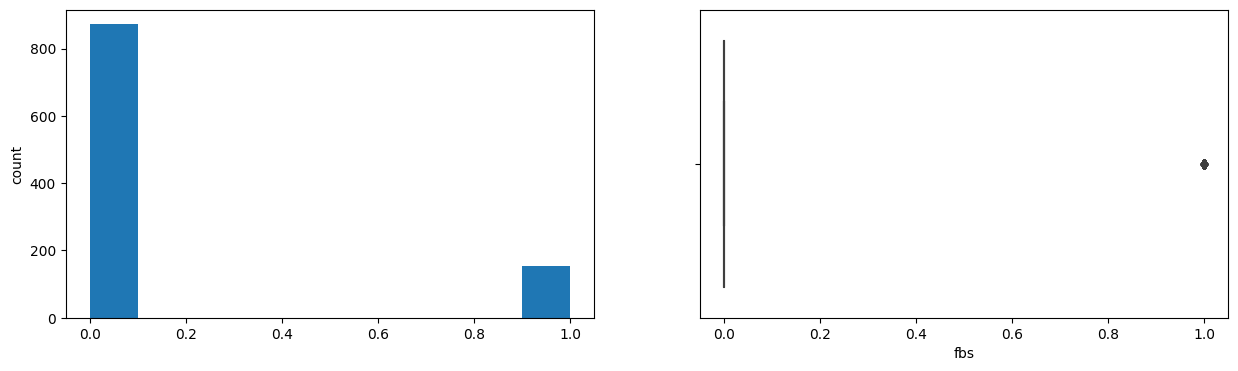

restecg
Skew : 0.18


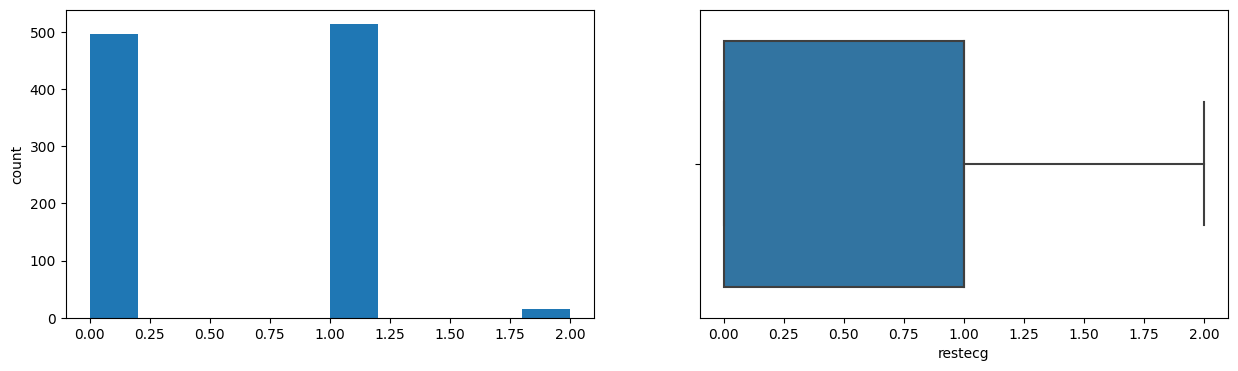

thalach
Skew : -0.51


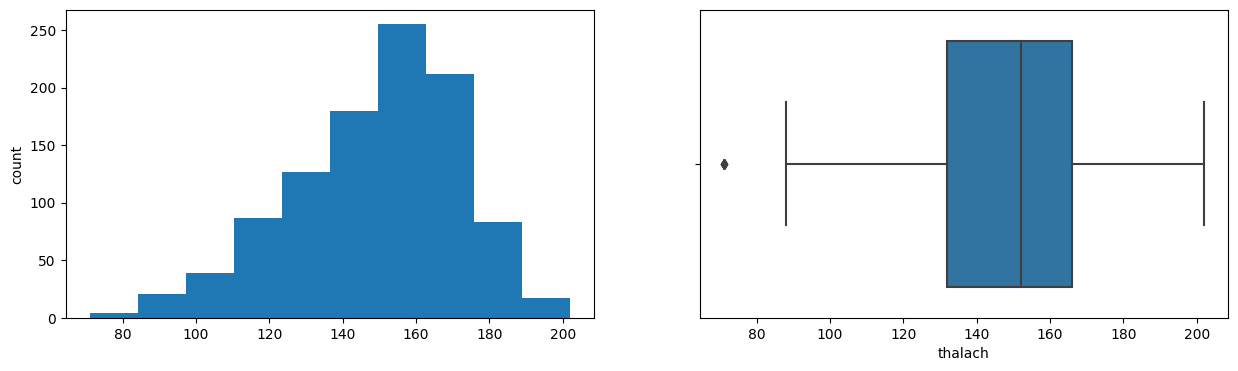

exang
Skew : 0.69


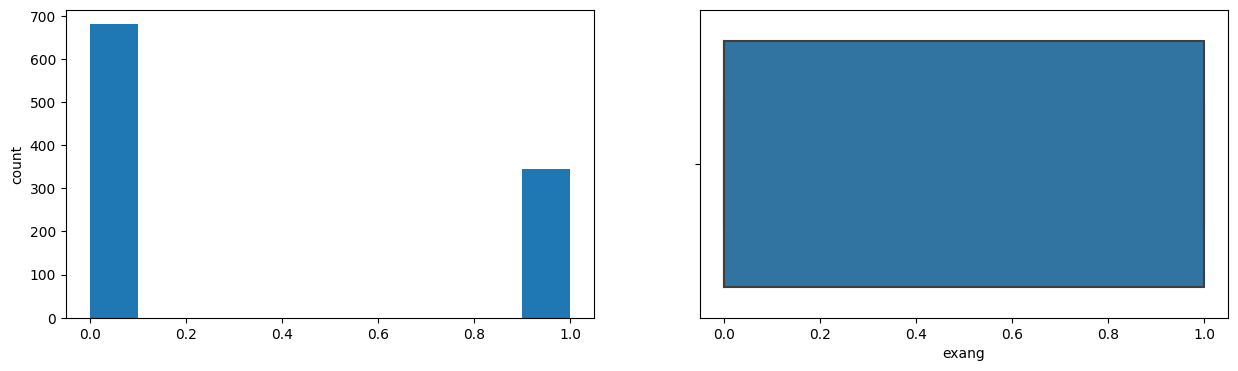

oldpeak
Skew : 1.21


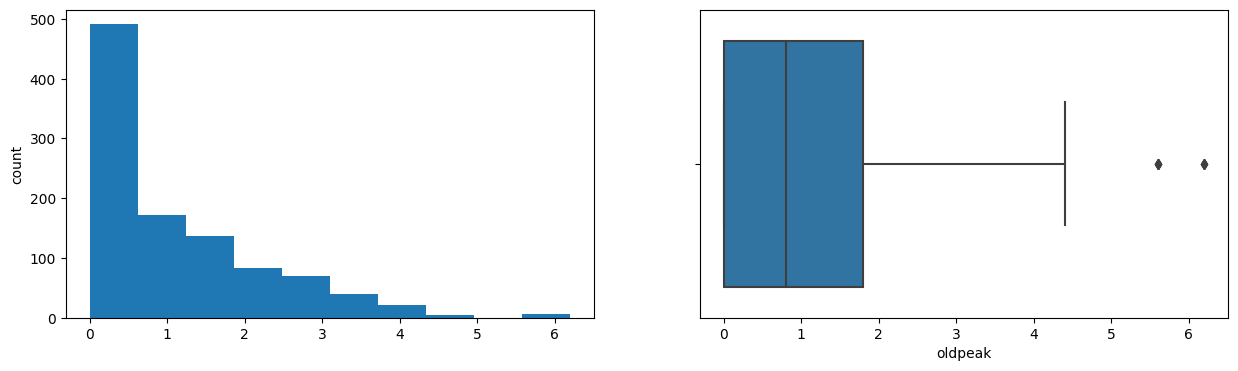

slope
Skew : -0.48


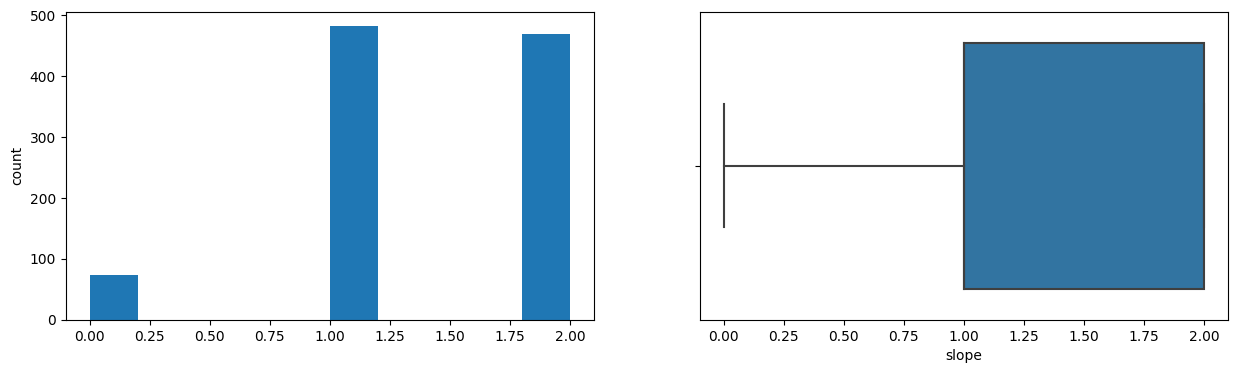

ca
Skew : 1.26


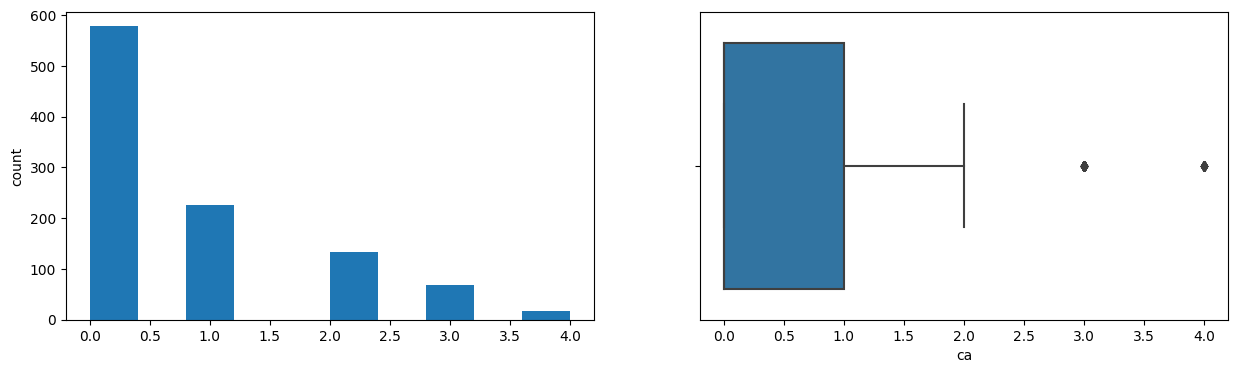

thal
Skew : -0.52


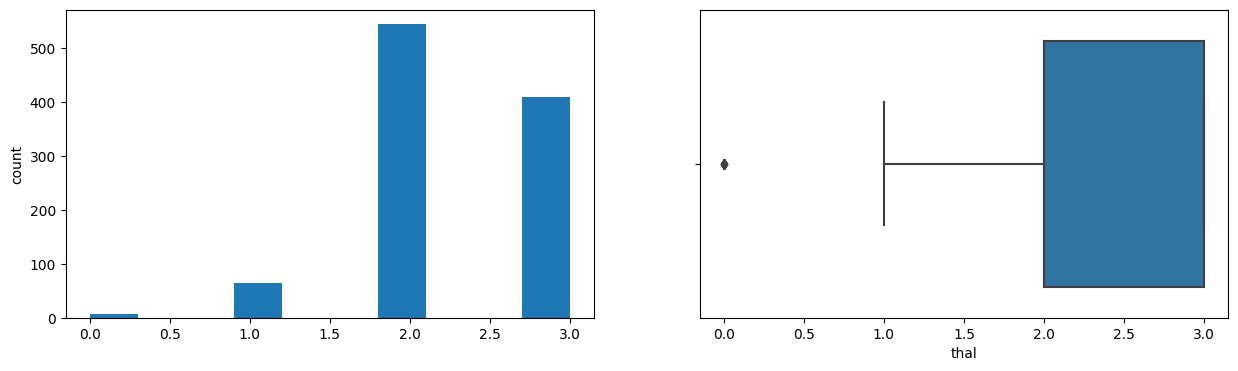

target
Skew : -0.05


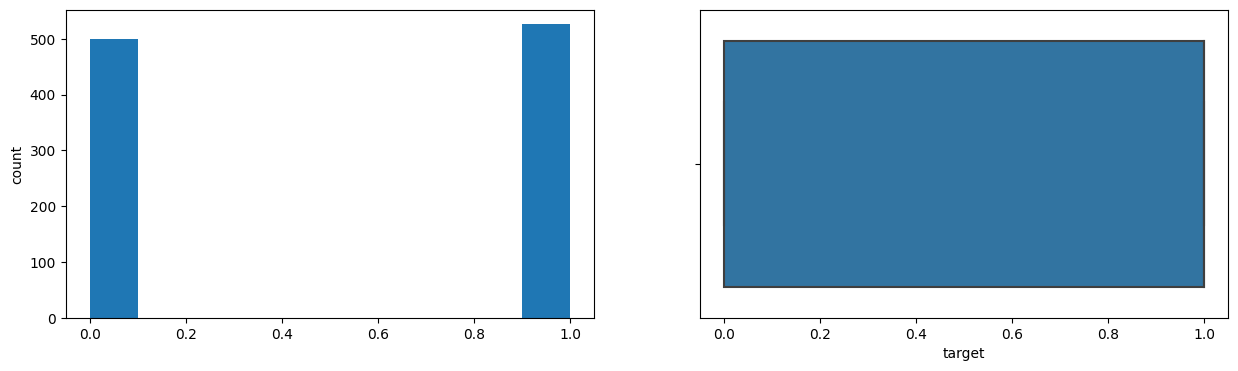

In [ ]:
num_cols = df.columns
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

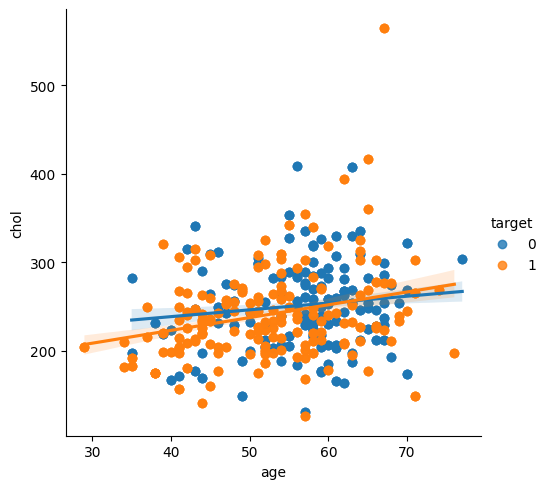

In [ ]:
sns.lmplot(data=df, x="age", y="chol", hue="target")

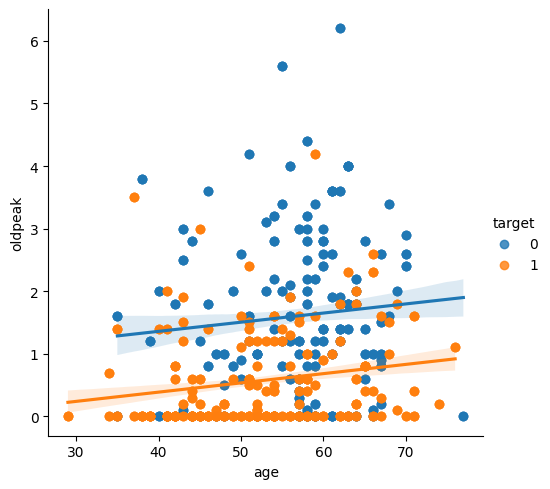

In [ ]:
sns.lmplot(data=df, x="age", y="oldpeak", hue="target")

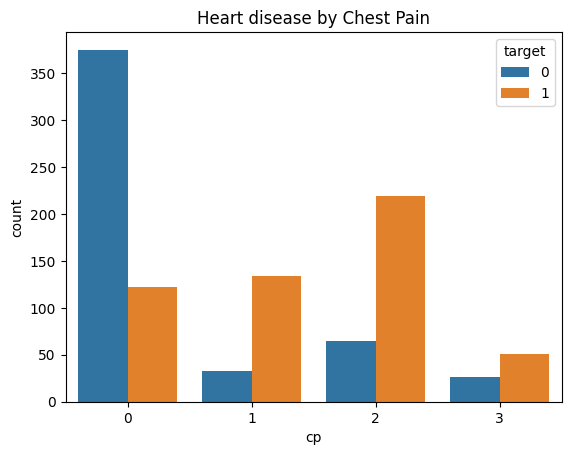

In [ ]:
sns.countplot(data=df, x="cp", hue="target")
plt.title("Heart disease by Chest Pain")
plt.show()

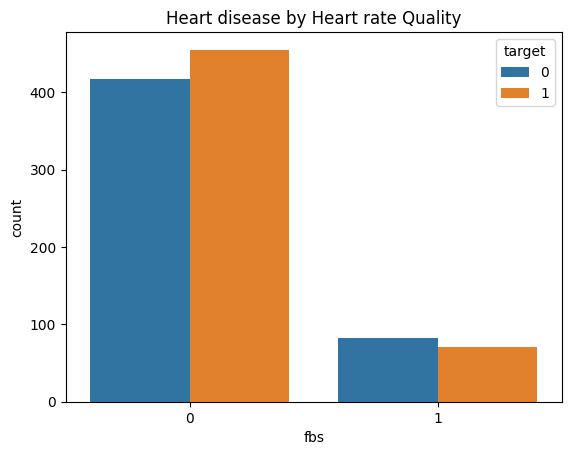

In [ ]:
sns.countplot(data=df, x="fbs", hue="target")
plt.title("Heart disease by Heart rate Quality")
plt.show()

<Axes: >

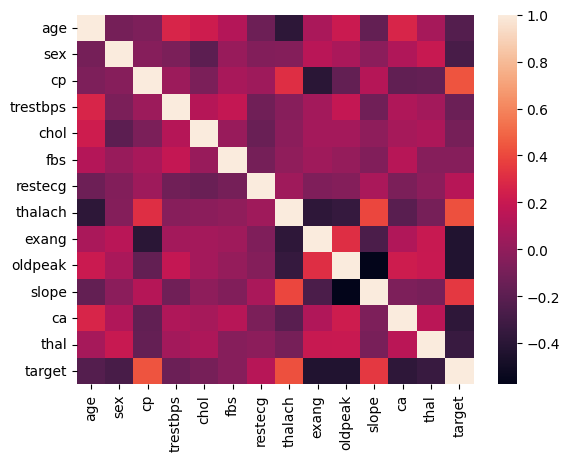

In [ ]:
sns.heatmap(data=df.corr())


In [ ]:
_ = df.groupby("target")["fbs"].value_counts().unstack()
_

fbs,0,1
target,,
0,417,82
1,455,71


In [ ]:
df.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [ ]:
X = df.drop(columns='target', axis=1)
Y = df['target']

In [ ]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


Model Training

In [ ]:
model_dict={}

##  **Logistic** **Regression**

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model evalution

Accuarcy Sorce

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
model_dict['Logitic Regression'] = training_data_accuracy


In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8524390243902439


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)
model_dict['Logistic_regression'] = test_data_accuracy



Accuracy on Test data :  0.8048780487804879


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score

#Accuracy Score using sklearn.metrics
acc_sc_sklearn1 = accuracy_score(Y_test,X_test_prediction)
#precision using sklearn metrics
pre_sc_sklearn1 = precision_score(Y_test,X_test_prediction)
#recall / sensitivity using sklearn function
recall_sklearn1  = recall_score(Y_test,X_test_prediction)
# F1 Score
F1_Score1 = metrics.f1_score(Y_test,X_test_prediction)
print(acc_sc_sklearn1)
print(pre_sc_sklearn1)
print(recall_sklearn1)
print(F1_Score1)

0.8048780487804879
0.768595041322314
0.8857142857142857
0.8230088495575221


In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test,X_test_prediction)
print(mat)

[[72 28]
 [12 93]]


Predective system

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **K** **Nearest** **Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
y_pred_knn = neigh.predict(X_test)
y_pred_knn[0:5]

array([0, 0, 0, 0, 1])

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_pred_knn))

Train set Accuracy:  0.9365853658536586
Test set Accuracy:  0.7951219512195122


Accuracy Score:-  0.7951219512195122
Precision Score:-  0.92
Confusion Matrix:- 
 [[94  6]
 [36 69]]


<Axes: >

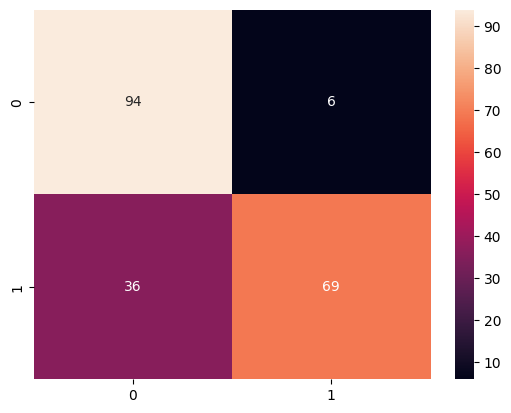

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
model_dict['K Nearest Neighbors '] = accuracy_score(Y_test, y_pred_knn)
print("Accuracy Score:- ", accuracy_score(Y_test, y_pred_knn))
print("Precision Score:- ", precision_score(Y_test, y_pred_knn))
print("Confusion Matrix:- \n", confusion_matrix(Y_test, y_pred_knn))# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix (Y_test, y_pred_knn)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score

#Accuracy Score using sklearn.metrics
acc_sc_sklearn2 = accuracy_score(Y_test,y_pred_knn)
#precision using sklearn metrics
pre_sc_sklearn2 = precision_score(Y_test,y_pred_knn)
#recall / sensitivity using sklearn function
recall_sklearn2  = recall_score(Y_test,y_pred_knn)
# F1 Score
F1_Score2 = metrics.f1_score(Y_test,y_pred_knn)
print(acc_sc_sklearn2)
print(pre_sc_sklearn2)
print(recall_sklearn2)
print(F1_Score2)

0.7951219512195122
0.92
0.6571428571428571
0.7666666666666667


# **Decision** **Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
predTree_dt = drugTree.predict(X_test)

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predTree_dt))

DecisionTrees's Accuracy:  0.8585365853658536


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score

#Accuracy Score using sklearn.metrics
acc_sc_sklearn3 = accuracy_score(Y_test,predTree_dt)
#precision using sklearn metrics
pre_sc_sklearn3 = precision_score(Y_test,predTree_dt)
#recall / sensitivity using sklearn function
recall_sklearn3  = recall_score(Y_test,predTree_dt)
# F1 Score
F1_Score3 = metrics.f1_score(Y_test,predTree_dt)
print(acc_sc_sklearn3)
print(pre_sc_sklearn3)
print(recall_sklearn3)
print(F1_Score3)

0.8585365853658536
0.8454545454545455
0.8857142857142857
0.8651162790697675


Accuracy Score:-  0.8585365853658536
Precision Score:-  0.8454545454545455
Confusion Matrix:- 
 [[83 17]
 [12 93]]


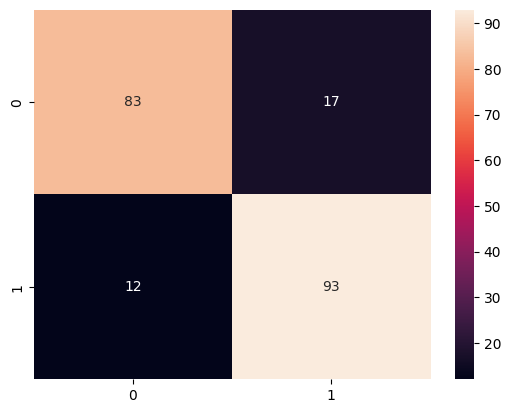

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
print("Accuracy Score:- ", accuracy_score(Y_test, predTree_dt))
print("Precision Score:- ", precision_score(Y_test, predTree_dt))
print("Confusion Matrix:- \n", confusion_matrix(Y_test, predTree_dt))
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix (Y_test, predTree_dt)
import seaborn as sns
sns.heatmap(cm, annot=True)
model_dict['Dession Tree'] = accuracy_score(Y_test, predTree_dt)


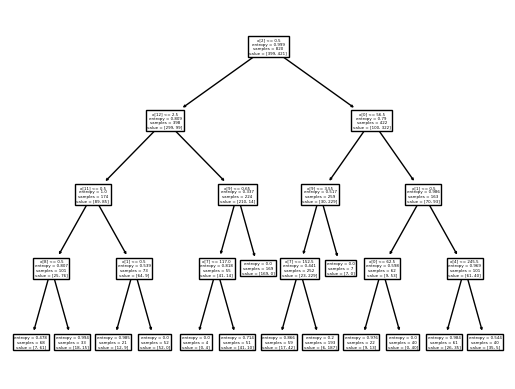

In [ ]:
tree.plot_tree(drugTree)
plt.show()

# **Support** **Vector** **Machine**

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='rbf')
model.fit(X_train, Y_train)
Y_pred_svm = model.predict(X_test)
model_dict['Support vector Machine'] =metrics.accuracy_score(Y_test, Y_pred_svm)
print("Support Vector Machine's Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_svm))

Support Vector Machine's Accuracy:  0.7073170731707317


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score

#Accuracy Score using sklearn.metrics
acc_sc_sklearn4 = accuracy_score(Y_test,Y_pred_svm)
#precision using sklearn metrics
pre_sc_sklearn4 = precision_score(Y_test,Y_pred_svm)
#recall / sensitivity using sklearn function
recall_sklearn4  = recall_score(Y_test,Y_pred_svm)
# F1 Score
F1_Score4 = metrics.f1_score(Y_test,Y_pred_svm)
print(acc_sc_sklearn4)
print(pre_sc_sklearn4)
print(recall_sklearn4)
print(F1_Score4)

0.7073170731707317
0.6890756302521008
0.780952380952381
0.7321428571428571


Confusion Matrix:- 
 [[63 37]
 [23 82]]


<Axes: >

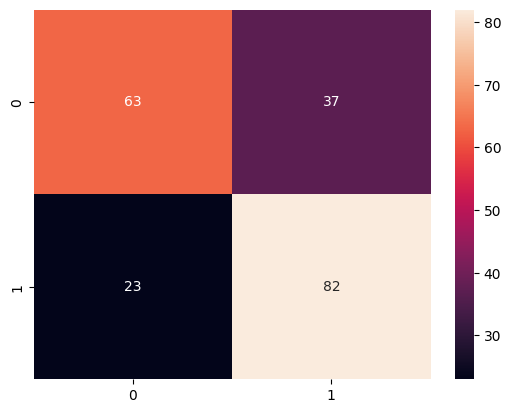

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:- \n", confusion_matrix(Y_test, Y_pred_svm))
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix (Y_test, Y_pred_svm)
import seaborn as sns
sns.heatmap(cm, annot=True)

# **Random** **Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, Y_train)
Y_pred_RF = model.predict(X_test)
model_dict[' Random Forest '] = accuracy_score(Y_test, Y_pred_RF)
print("Random Forest's Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_RF))

Random Forest's Accuracy:  1.0


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score

#Accuracy Score using sklearn.metrics
acc_sc_sklearn5 = accuracy_score(Y_test,Y_pred_RF)
#precision using sklearn metrics
pre_sc_sklearn5 = precision_score(Y_test,Y_pred_RF)
#recall / sensitivity using sklearn function
recall_sklearn5  = recall_score(Y_test,Y_pred_RF)
# F1 Score
F1_Score5 = metrics.f1_score(Y_test,Y_pred_RF)
print(acc_sc_sklearn5)
print(pre_sc_sklearn5)
print(recall_sklearn5)
print(F1_Score5)

1.0
1.0
1.0
1.0


Accuracy Score:-  1.0
Precision Score:-  1.0
Confusion Matrix:- 
 [[100   0]
 [  0 105]]


<Axes: >

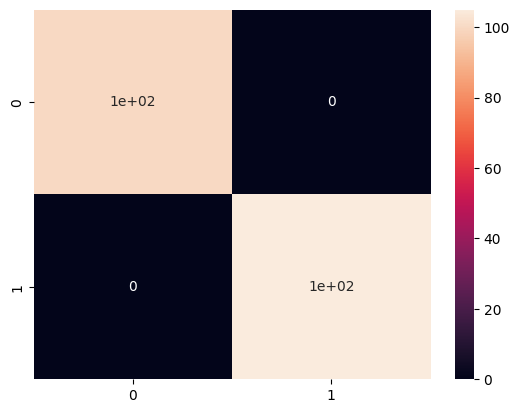

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
print("Accuracy Score:- ", accuracy_score(Y_test, Y_pred_RF))
print("Precision Score:- ", precision_score(Y_test, Y_pred_RF))
print("Confusion Matrix:- \n", confusion_matrix(Y_test, Y_pred_RF))
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix (Y_test, Y_pred_RF)
import seaborn as sns
sns.heatmap(cm, annot=True)

# **Naive** **Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifer = GaussianNB()
predictor = classifer.fit(X_train, Y_train)
y_pred = predictor.predict(X_test)
accuracy_naive_bayes = accuracy_score(Y_test , y_pred)
model_dict['naive_bayes'] = accuracy_naive_bayes
print(accuracy_naive_bayes)

0.7804878048780488


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score

#Accuracy Score using sklearn.metrics
acc_sc_sklearn6 = accuracy_score(Y_test,y_pred)
#precision using sklearn metrics
pre_sc_sklearn6 = precision_score(Y_test,y_pred)
#recall / sensitivity using sklearn function
recall_sklearn6  = recall_score(Y_test,y_pred)
# F1 Score
F1_Score6 = metrics.f1_score(Y_test,y_pred)
print(acc_sc_sklearn6)
print(pre_sc_sklearn6)
print(recall_sklearn6)
print(F1_Score6)

0.7804878048780488
0.7727272727272727
0.8095238095238095
0.7906976744186046


<Axes: >

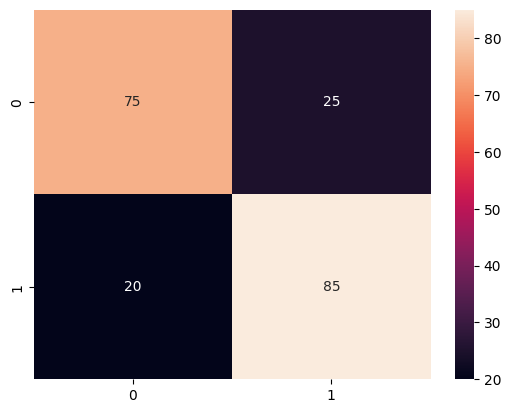

In [ ]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix (Y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
model_dict

{'Logitic Regression': 0.8524390243902439,
 'Logistic_regression': 0.8048780487804879,
 'K Nearest Neighbors ': 0.7951219512195122,
 'Dession Tree': 0.8585365853658536,
 'Support vector Machine': 0.7073170731707317,
 ' Random Forest ': 1.0,
 'naive_bayes': 0.7804878048780488}

In [ ]:
model_accuracies_df = pd.DataFrame(columns=['Model', 'Accuracy'])
model_accuracies_df['Model'] = model_dict.keys()
model_accuracies_df['Accuracy'] = model_dict.values()
model_accuracies_df

,Model,Accuracy
0,Logitic Regression,0.852439
1,Logistic_regression,0.804878
2,K Nearest Neighbors,0.795122
3,Dession Tree,0.858537
4,Support vector Machine,0.707317
5,Random Forest,1.000000
6,naive_bayes,0.780488


In [ ]:
model_accuracies_df.sort_values(by = "Accuracy", ascending=False)


,Model,Accuracy
5,Random Forest,1.000000
3,Dession Tree,0.858537
0,Logitic Regression,0.852439
1,Logistic_regression,0.804878
2,K Nearest Neighbors,0.795122
6,naive_bayes,0.780488
4,Support vector Machine,0.707317


XG BOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,classification_report


dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)


params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',        # Logarithmic Loss (logloss) for evaluation
    'eta': 0.1,                     # Learning rate
    'max_depth': 3,                  # Maximum tree depth
    'min_child_weight': 1,           # Minimum sum of instance weight (Hessian) needed in a child
    'gamma': 0.1,                    # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': 0.8,                # Subsample ratio of the training instances
    'colsample_bytree': 0.8,         # Subsample ratio of columns when constructing each tree
    'seed': 42                       # Random seed for reproducibility
}


num_rounds = 100  # Number of boosting rounds (trees)
model = xgb.train(params, dtrain, num_rounds)


y_pred = model.predict(dtest)

# Convert probability to binary prediction (threshold 0.5)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Calculate accuracy and print the classification report
print("Confusion Matrix:- \n", confusion_matrix(Y_test, y_pred_binary))
print("Accuracy Score:- ", accuracy_score(Y_test, y_pred_binary))
print("Precision Score:- ", precision_score(Y_test, y_pred_binary))
print("recall score:-",recall_score(Y_test, y_pred_binary))
print("f1 score:-",f1_score(Y_test, y_pred_binary))
print("\nClassification report:\n\n",classification_report(Y_test, y_pred_binary))

Confusion Matrix:- 
 [[ 98   2]
 [  5 100]]
Accuracy Score:-  0.9658536585365853
Precision Score:-  0.9803921568627451
recall score:- 0.9523809523809523
f1 score:- 0.966183574879227

Classification report:

               precision    recall  f1-score   support

           0       0.95      0.98      0.97       100
           1       0.98      0.95      0.97       105

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



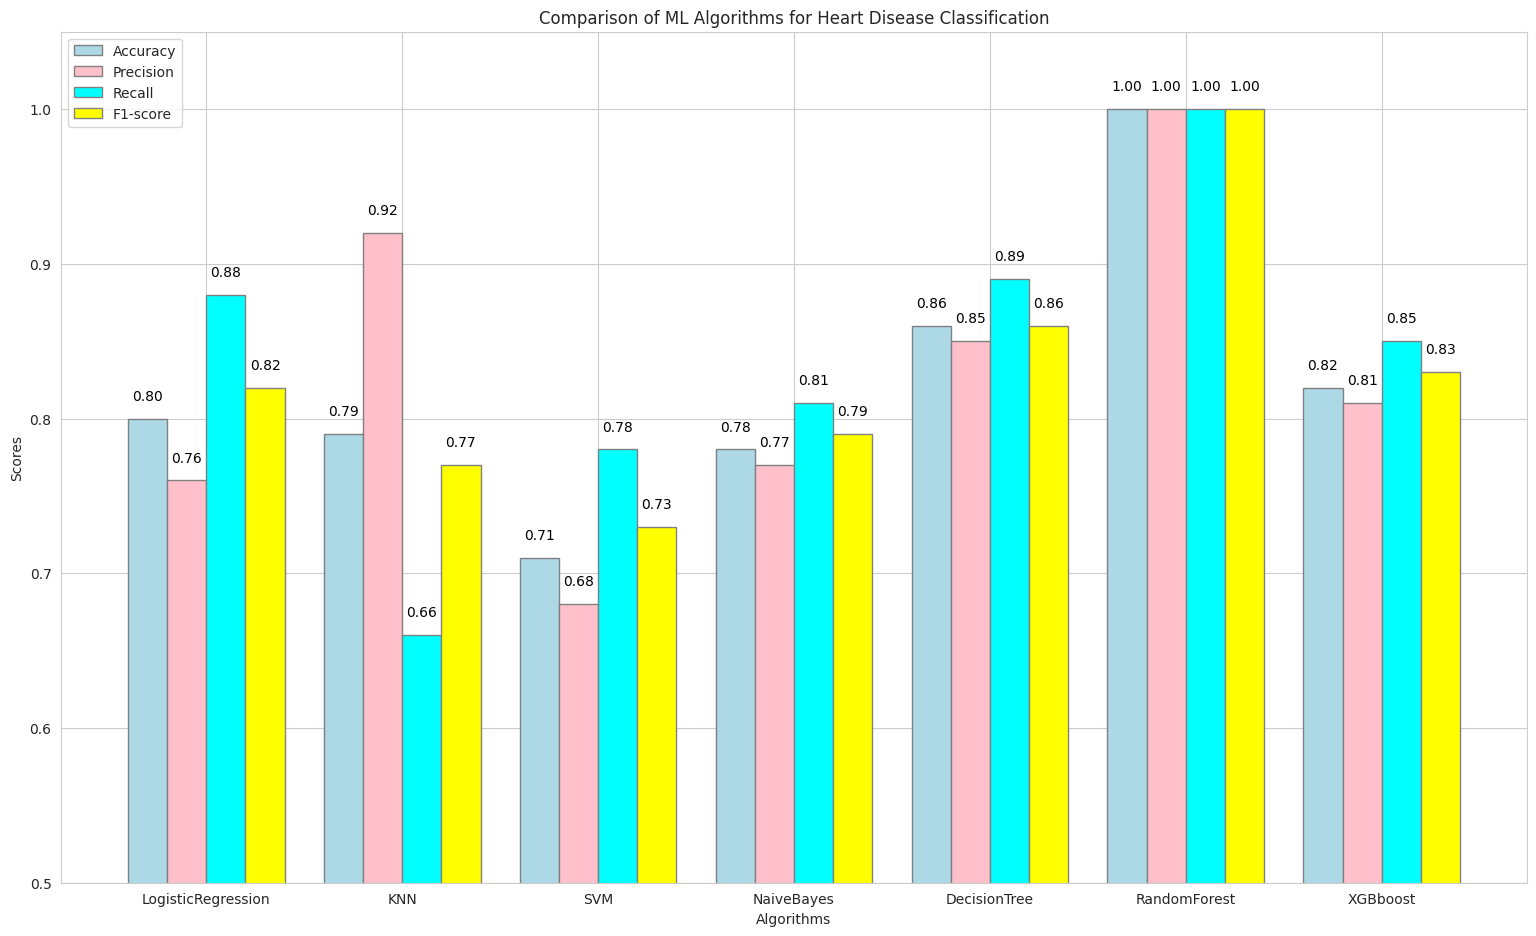

In [ ]:
algorithms = ['LogisticRegression','KNN','SVM','NaiveBayes','DecisionTree','RandomForest','XGBboost']
accuracy_scores = [0.80, 0.79, 0.71, 0.78, 0.86, 1.0, 0.82]
precision_scores = [0.76, 0.92, 0.68, 0.77, 0.85, 1.0, 0.81]
recall_scores =[0.88, 0.66, 0.78, 0.81, 0.89, 1.0, 0.85]
f1_scores =[0.82, 0.77, 0.73, 0.79, 0.86, 1.0, 0.83]

plt.figure(figsize=(16, 10), dpi=100)
sns.set_style('whitegrid')
bar_width = 0.2
r1 = range(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + 2 * bar_width for x in r1]
r4 = [x + 3 * bar_width for x in r1]
plt.bar(r1, accuracy_scores, color='lightblue', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision_scores, color='pink', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3,recall_scores, color='cyan', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_scores, color='yellow', width=bar_width, edgecolor='grey', label='F1-score')
plt.xticks([r + 1.5 * bar_width for r in range(len(algorithms))], algorithms)


plt.ylim(0.5, 1.05)

for x, y_acc, y_prec, y_rec, y_f1 in zip(r1, accuracy_scores, precision_scores, recall_scores, f1_scores):
    plt.text(x, y_acc + 0.01, f'{y_acc:.2f}', ha='center', va='bottom', color='black')
    plt.text(x + bar_width, y_prec + 0.01, f'{y_prec:.2f}', ha='center', va='bottom', color='black')
    plt.text(x + 2 * bar_width, y_rec + 0.01, f'{y_rec:.2f}', ha='center', va='bottom', color='black')
    plt.text(x + 3 * bar_width, y_f1 + 0.01, f'{y_f1:.2f}', ha='center', va='bottom', color='black')
plt.legend(loc='upper left')
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Comparison of ML Algorithms for Heart Disease Classification')
plt.tight_layout(pad=3.0)
plt.show()